In [22]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn

In [7]:
stock = ["AAPL","MSFT","AMZN","GOOGL","INTC"]
stocks = yf.download(stock,start="2010-01-01",end="2020-11-01")

[*********************100%***********************]  5 of 5 completed


In [8]:
data = stocks.loc[:,"Close"].copy()

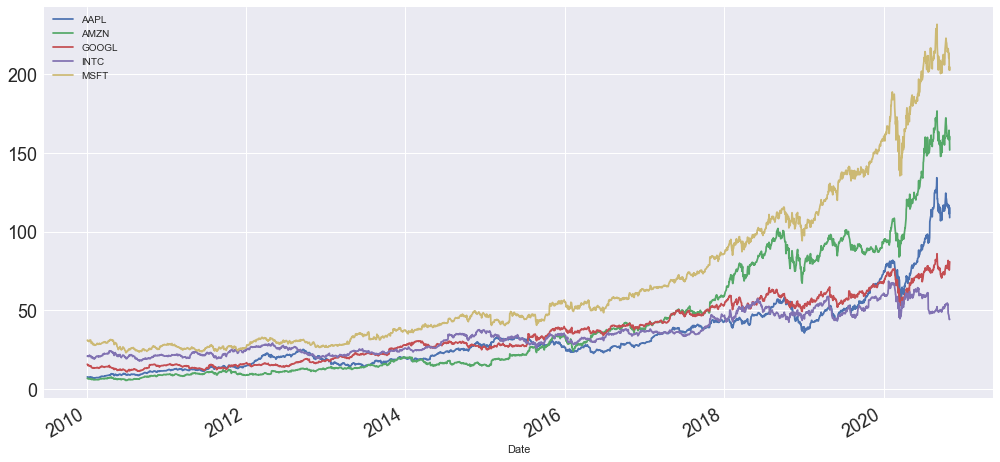

In [9]:
data.plot(figsize=(17,8),fontsize = 18)
plt.style.use("seaborn")
plt.show()

In [10]:
data.head()

,AAPL,AMZN,GOOGL,INTC,MSFT
Date,,,,,
2010-01-04,7.643214,6.6950,15.684434,20.879999,30.950001
2010-01-05,7.656429,6.7345,15.615365,20.870001,30.959999
2010-01-06,7.534643,6.6125,15.221722,20.799999,30.770000
2010-01-07,7.520714,6.5000,14.867367,20.600000,30.450001
2010-01-08,7.570714,6.6760,15.065566,20.830000,30.660000


In [17]:
data.pct_change()

,AAPL,AMZN,GOOGL,INTC,MSFT
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.005900,-0.004404,-0.000479,0.000323
2010-01-06,-0.015906,-0.018116,-0.025209,-0.003354,-0.006137
2010-01-07,-0.001849,-0.017013,-0.023280,-0.009615,-0.010400
2010-01-08,0.006648,0.027077,0.013331,0.011165,0.006897
...,...,...,...,...,...
2020-10-26,0.000087,0.000824,-0.029817,-0.030705,-0.028442
2020-10-27,0.013472,0.024724,0.009209,-0.023116,0.015089
2020-10-28,-0.046312,-0.037595,-0.055089,-0.030456,-0.049566


In [18]:
com = data.pct_change().dropna()
com.describe()

,AAPL,AMZN,GOOGL,INTC,MSFT
count,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000
mean,0.001134,0.001345,0.000735,0.000436,0.000818
std,0.017843,0.020019,0.016377,0.017888,0.016029
min,-0.128647,-0.126568,-0.116341,-0.180415,-0.147390
25%,-0.007128,-0.008320,-0.006608,-0.008098,-0.006960
50%,0.000903,0.001103,0.000686,0.000508,0.000664
75%,0.010354,0.011692,0.008819,0.008943,0.008637
max,0.119808,0.157457,0.162584,0.195213,0.142169


In [36]:
su = com.describe().T.loc[:,["mean","std"]]
su

,mean,std
AAPL,0.001134,0.017843
AMZN,0.001345,0.020019
GOOGL,0.000735,0.016377
INTC,0.000436,0.017888
MSFT,0.000818,0.016029


In [37]:
su["mean"] = su["mean"] * 252
su["std"] = su["std"] * np.sqrt(252)
su

,mean,std
AAPL,0.285834,0.283249
AMZN,0.338957,0.317793
GOOGL,0.185211,0.259972
INTC,0.109961,0.283958
MSFT,0.206062,0.254457


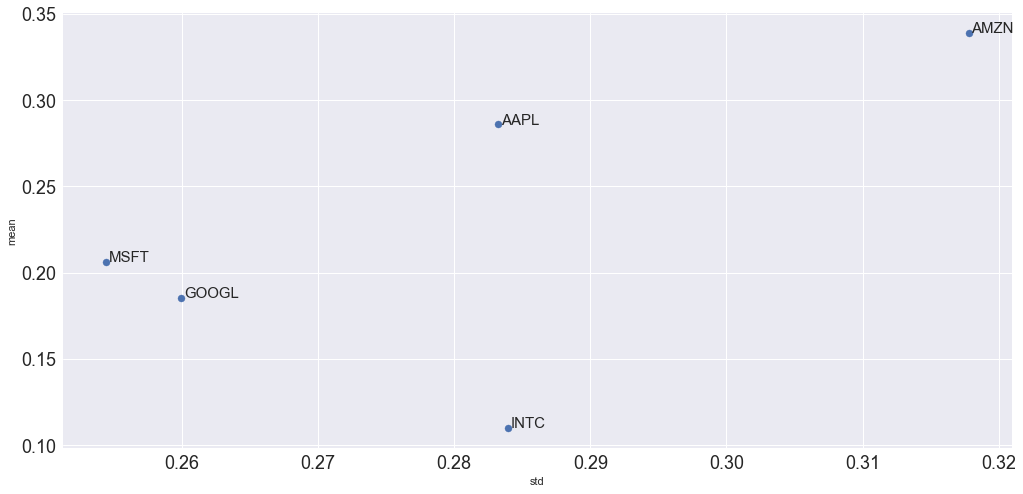

In [38]:
su.plot.scatter(x="std",y="mean",figsize=(17,8),fontsize = 18,s=50)
for i in su.index:
    plt.annotate( i , xy = ( su.loc[i,"std"] + 0.0002 , su.loc[i,"mean"] + 0.0002),size=15)

In [14]:
data.div(data.iloc[0]) 

,AAPL,AMZN,GOOGL,INTC,MSFT
Date,,,,,
2010-01-04,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-05,1.001729,1.005900,0.995596,0.999521,1.000323
2010-01-06,0.985795,0.987677,0.970499,0.996169,0.994184
2010-01-07,0.983973,0.970874,0.947906,0.986590,0.983845
2010-01-08,0.990514,0.997162,0.960543,0.997605,0.990630
...,...,...,...,...,...
2020-10-26,15.052568,23.951008,5.050517,2.237548,6.787722
2020-10-27,15.255362,24.543166,5.097028,2.185824,6.890145
2020-10-28,14.548853,23.620464,4.816240,2.119253,6.548626


In [15]:
data.div(data.iloc[0]) * 100

,AAPL,AMZN,GOOGL,INTC,MSFT
Date,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.172893,100.589989,99.559634,99.952115,100.032305
2010-01-06,98.579511,98.767737,97.049863,99.616859,99.418416
2010-01-07,98.397266,97.087376,94.790586,98.659010,98.384491
2010-01-08,99.051443,99.716205,96.054254,99.760540,99.063002
...,...,...,...,...,...
2020-10-26,1505.256815,2395.100835,505.051701,223.754804,678.772202
2020-10-27,1525.536182,2454.316558,509.702808,218.582381,689.014523
2020-10-28,1454.885257,2362.046356,481.624018,211.925296,654.862642


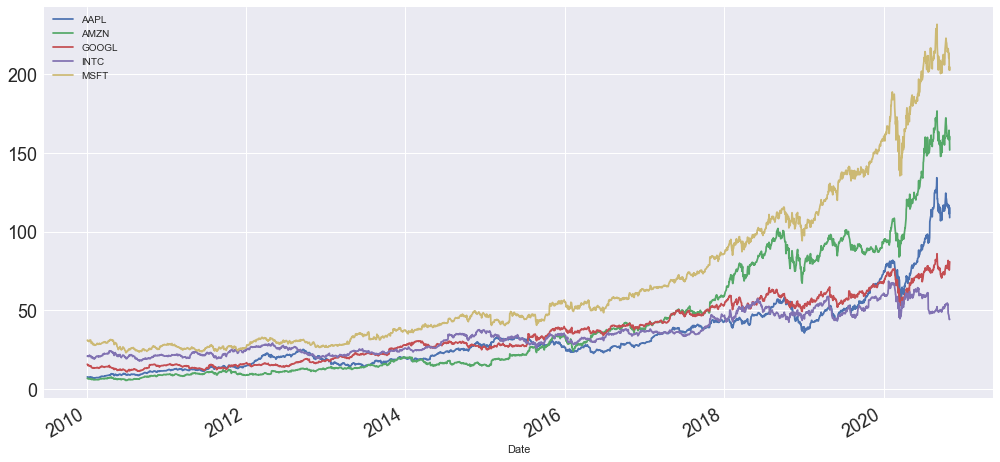

In [13]:
nor_data = data.div(data.iloc[0]) * 100
data.plot(figsize=(17,8),fontsize = 18)
plt.style.use("seaborn")
plt.show()

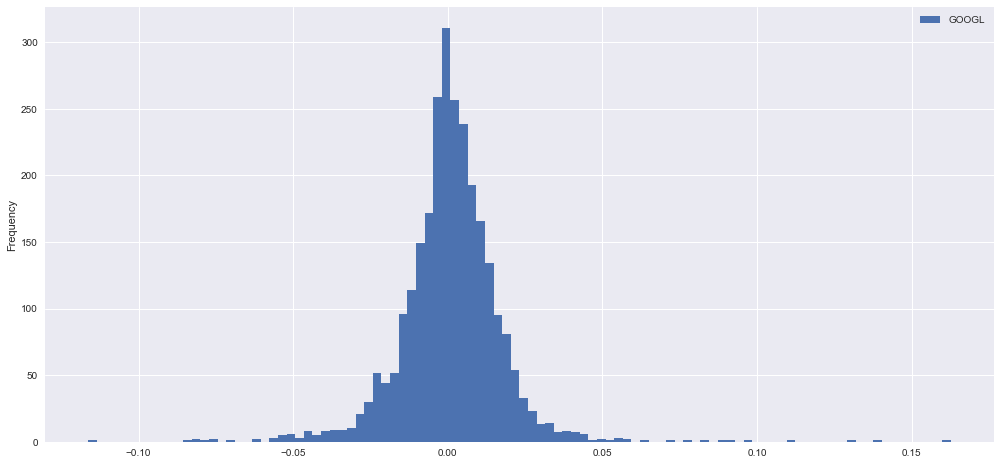

In [16]:
google = nor_data.GOOGL.copy().to_frame()
ret = google.pct_change().dropna()

ret.plot(kind="hist",figsize = (17,8),bins = 100)
plt.show()